# **WQD 7001**: DIABETES PREDICTION (CLEANING & EDA)

Our aim is to create a diabetes prediction model based on information collected from wearable IoT devices.

As such, we first classify their diabetic status using glyhb(3 months avg, and can be only tested in the lab), and discard it.

Then, we do ML on the other variables to predict diabetes.

##Import Required Modules

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import plotly.graph_objects as go #
import plotly.express as px
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from google.colab import drive
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'turbo', 'twilight']
import scipy.stats as stats
%matplotlib inline
from scipy.stats import chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm
import scipy.stats.distributions as dist

##Mount Drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# for YS' directory
%cd /content/gdrive/My Drive/WQD 7001

/content/gdrive/My Drive/WQD 7001


In [ ]:
# for JUSTIN's directory
%cd /content/gdrive/My Drive/WQD7001-Principles of Data Science

/content/gdrive/My Drive/WQD7001-Principles of Data Science


In [ ]:
! ls

 Bar_charts.pdf      Correlations.pdf   Histograms.pdf	     QQPlots.pdf
 Boxplots_pair.pdf   df.csv	        kde_plots.pdf	    'WQD7001 Diabetes Prediction.ipynb'
 Boxplots.pdf	     diabetes.csv       Pairwise_plots.pdf


## Load Data and Check for Missing Values

In [ ]:
df = pd.read_csv('diabetes.csv');df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


In [ ]:
missingValues = df.isnull().sum()
print("Missing Values:" ,"\n")
print(missingValues)

Missing Values: 

id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64


##Begin Data Cleaning (Classification and Deletion)


Dropping columns bp.2s and bp.2d due to many missing values

In [ ]:
df = df.drop(['bp.2s','bp.2d'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  waist     401 non-null    float64
 15  hip       401 non-null    float64
 16  time.ppn  400 non-null    float64
dtypes: float64(11), int64(3), object(3)
memory usage: 53.6+ KB


Checking for Outliers:

Notes: Huge bunch of points outside IQR does not simply imply outliers. Could be the fact that the distribution is actually heavy(long)-tailed.

Perhaps do something to one obs. from the ratio? Impute or discard?

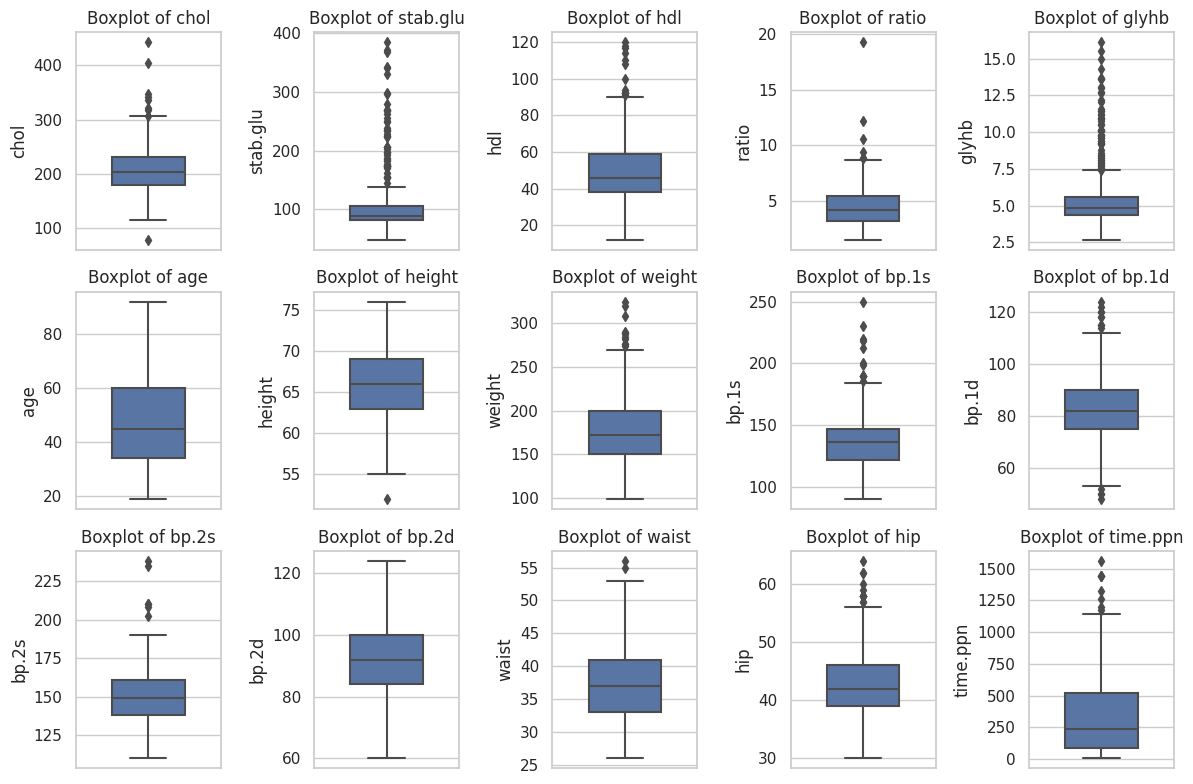

In [ ]:
columns_to_exclude = ['id', 'location', 'gender', 'frame']
filtered_columns = [col for col in df.columns if col not in columns_to_exclude]


plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
for col in filtered_columns:
    plt.subplot(3, 5, filtered_columns.index(col) + 1)
    sns.boxplot(data=df, y=col, orient="v", width=0.5)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
max_ratio_row = df.loc[df['ratio'].idxmax()]
print(max_ratio_row)



id                2778
chol             443.0
stab.glu           185
hdl               23.0
ratio        19.299999
glyhb            14.31
location    Buckingham
age                 51
gender          female
height            70.0
weight           235.0
frame           medium
bp.1s            158.0
bp.1d             98.0
waist             43.0
hip               48.0
time.ppn         420.0
Name: 62, dtype: object


Now check that all patients are unique. If unique, drop 'id' and reset index.

In [ ]:
df.dropna(subset =['glyhb'],inplace = True)
df.isnull().sum()



id           0
chol         1
stab.glu     0
hdl          1
ratio        1
glyhb        0
location     0
age          0
gender       0
height       5
weight       1
frame       11
bp.1s        5
bp.1d        5
waist        2
hip          2
time.ppn     3
dtype: int64

In [ ]:
df['id'].is_unique
df=df.drop(['id'],axis=1)
df = df.reset_index(drop=True)
df

chol  stab.glu    hdl  ratio      glyhb    location  age  gender  \
0    203.0        82   56.0    3.6   4.310000  Buckingham   46  female   
1    165.0        97   24.0    6.9   4.440000  Buckingham   29  female   
2    228.0        92   37.0    6.2   4.640000  Buckingham   58  female   
3     78.0        93   12.0    6.5   4.630000  Buckingham   67    male   
4    249.0        90   28.0    8.9   7.720000  Buckingham   64    male   
..     ...       ...    ...    ...        ...         ...  ...     ...   
385  301.0        90  118.0    2.6   4.280000      Louisa   89  female   
386  296.0       369   46.0    6.4  16.110001      Louisa   53    male   
387  284.0        89   54.0    5.3   4.390000      Louisa   51  female   
388  194.0       269   38.0    5.1  13.630000      Louisa   29  female   
389  199.0        76   52.0    3.8   4.490000      Louisa   41  female   

     height  weight   frame  bp.1s  bp.1d  waist   hip  time.ppn  
0      62.0   121.0  medium  118.0   59.0   29.0  38.0     720.0  
1      64.0   218.0   large  112.0   68.0   46.0  48.0     360.0  
2      61.0   256.0   large  190.0   92.0   49.0  57.0     180.0  
3      67.0   119.0   large  110.0   50.0   33.0  38.0     480.0  
4      68.0   183.0  medium  138.0   80.0   44.0  41.0     300.0  
..      ...     ...     ...    ...    ...    ...   ...       ...  
385    61.0   115.0  medium  218.0   90.0   31.0  41.0     210.0  
386    69.0   173.0  medium  138.0   94.0   35.0  39.0     210.0  
387    63.0   154.0  medium  140.0  100.0   32.0  43.0     180.0  
388    69.0   167.0   small  120.0   70.0   33.0  40.0      20.0  
389    63.0   197.0  medium  120.0   78.0   41.0  48.0     255.0  

[390 rows x 16 columns]

Add diabetic status column and classify them. 1 indicates diabetic and 0 indicates non-diabetic.

In [ ]:
df['diabetic'] = df['glyhb'].apply(lambda x: 1 if x >= 6.5 else 0)

# where 1 = diabetic, 0 = non-diabetic
count = df['diabetic'].value_counts()
withDiabetes = count[1]
withoutDiabetes = count[0]
print(f"Diabetic Count: {withDiabetes} \nNon-Diabetic Count: {withoutDiabetes}")



Diabetic Count: 65 
Non-Diabetic Count: 325


Drop glyhb column

In [ ]:
df=df.drop(['glyhb'],axis=1)
df

chol  stab.glu    hdl  ratio    location  age  gender  height  weight  \
0    203.0        82   56.0    3.6  Buckingham   46  female    62.0   121.0   
1    165.0        97   24.0    6.9  Buckingham   29  female    64.0   218.0   
2    228.0        92   37.0    6.2  Buckingham   58  female    61.0   256.0   
3     78.0        93   12.0    6.5  Buckingham   67    male    67.0   119.0   
4    249.0        90   28.0    8.9  Buckingham   64    male    68.0   183.0   
..     ...       ...    ...    ...         ...  ...     ...     ...     ...   
385  301.0        90  118.0    2.6      Louisa   89  female    61.0   115.0   
386  296.0       369   46.0    6.4      Louisa   53    male    69.0   173.0   
387  284.0        89   54.0    5.3      Louisa   51  female    63.0   154.0   
388  194.0       269   38.0    5.1      Louisa   29  female    69.0   167.0   
389  199.0        76   52.0    3.8      Louisa   41  female    63.0   197.0   

      frame  bp.1s  bp.1d  waist   hip  time.ppn  diabetic  
0    medium  118.0   59.0   29.0  38.0     720.0         0  
1     large  112.0   68.0   46.0  48.0     360.0         0  
2     large  190.0   92.0   49.0  57.0     180.0         0  
3     large  110.0   50.0   33.0  38.0     480.0         0  
4    medium  138.0   80.0   44.0  41.0     300.0         1  
..      ...    ...    ...    ...   ...       ...       ...  
385  medium  218.0   90.0   31.0  41.0     210.0         0  
386  medium  138.0   94.0   35.0  39.0     210.0         1  
387  medium  140.0  100.0   32.0  43.0     180.0         0  
388   small  120.0   70.0   33.0  40.0      20.0         1  
389  medium  120.0   78.0   41.0  48.0     255.0         0  

[390 rows x 16 columns]

##Some Numerical and Graphical Summaries before Imputation.

Numerical summaries of Diabetic and Non-Diabetic Patients: On Mean, Median and Variance.

In [ ]:
print("Mean \n")
df.groupby('diabetic').mean().T

Mean 



<ipython-input-10-70d107f3111e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('diabetic').mean().T


diabetic           0           1
chol      202.953704  228.815385
stab.glu   90.889231  189.584615
hdl        51.225309   45.492308
ratio       4.304012    5.635385
age        44.443077   58.430769
height     65.953271   66.140625
weight    174.566154  191.484375
bp.1s     134.903125  148.200000
bp.1d      82.987500   84.753846
waist      37.318885   40.769231
hip        42.681115   44.784615
time.ppn  330.838509  362.307692

In [ ]:
print("Median \n")
df.groupby('diabetic').median().T

Median 



<ipython-input-11-abe4a0f07f96>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('diabetic').median().T


diabetic      0      1
chol      199.0  219.0
stab.glu   86.0  184.0
hdl        47.0   41.0
ratio       4.1    5.3
age        41.0   59.0
height     66.0   67.0
weight    170.0  184.5
bp.1s     131.5  146.0
bp.1d      82.0   86.0
waist      37.0   40.0
hip        42.0   44.0
time.ppn  240.0  240.0

In [ ]:
print("Standard Deviation \n")
df.groupby('diabetic').std().T

Standard Deviation 



<ipython-input-12-994ae4dc222c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('diabetic').std().T


diabetic           0           1
chol       40.687448   56.575694
stab.glu   24.804172   78.947746
hdl        16.966599   18.278337
ratio       1.426035    2.561276
age        16.095030   12.841545
height      3.965594    3.745334
weight     40.093634   39.543021
bp.1s      22.889950   20.309481
bp.1d      13.665042   13.171976
waist       5.636547    5.558690
hip         5.660738    5.292956
time.ppn  303.543063  335.476663

Graphical plots to Investigate Pairwise Relationships of Continuous Variables

Check plausible regression based inputation. Possible positive linear pairs:

(weight\~waist)\
(weight\~hip)\
(waist\~hip) \
(bp.1s\~bp.1d)\

In [ ]:
sns.pairplot(df,hue='diabetic')

Pairwise Pearson Correlation

In [ ]:
continuous_variables = df.select_dtypes(include=['float64'])


correlation_matrix = continuous_variables.corr(method='pearson')


p_values = pd.DataFrame(index=continuous_variables.columns, columns=continuous_variables.columns)


for col1 in continuous_variables.columns:
    for col2 in continuous_variables.columns:
        if col1 != col2:
            non_nan_rows = ~continuous_variables[[col1, col2]].isna().any(axis=1)
            corr, p_value = stats.pearsonr(continuous_variables[non_nan_rows][col1], continuous_variables[non_nan_rows][col2])
            p_values.at[col1, col2] = p_value


print("Correlation Matrix:")
print(correlation_matrix)


print("\nP-Values:")
print(p_values)



Correlation Matrix:
              chol       hdl     ratio    height    weight     bp.1s  \
chol      1.000000  0.193256  0.475752 -0.069954  0.070312  0.206772   
hdl       0.193256  1.000000 -0.681900 -0.090995 -0.287048  0.032583   
ratio     0.475752 -0.681900  1.000000  0.081767  0.280616  0.114091   
height   -0.069954 -0.090995  0.081767  1.000000  0.247133 -0.042653   
weight    0.070312 -0.287048  0.280616  0.247133  1.000000  0.097588   
bp.1s     0.206772  0.032583  0.114091 -0.042653  0.097588  1.000000   
bp.1d     0.166756  0.079643  0.037351  0.047277  0.169931  0.603485   
bp.2s     0.092762  0.132953 -0.048171 -0.053380 -0.068219  0.865958   
bp.2d     0.015642  0.152930 -0.157386  0.083664  0.045315  0.277655   
waist     0.132257 -0.275020  0.311100  0.052358  0.852510  0.207571   
hip       0.089831 -0.220478  0.204489 -0.106950  0.830774  0.150316   
time.ppn  0.013192  0.065696 -0.041882 -0.012302 -0.048421 -0.077174   

             bp.1d     bp.2s     bp.2d     

Distribution of the data in each column towards diabetic outcome

ValueError: num must be an integer with 1 <= num <= 16, not 17

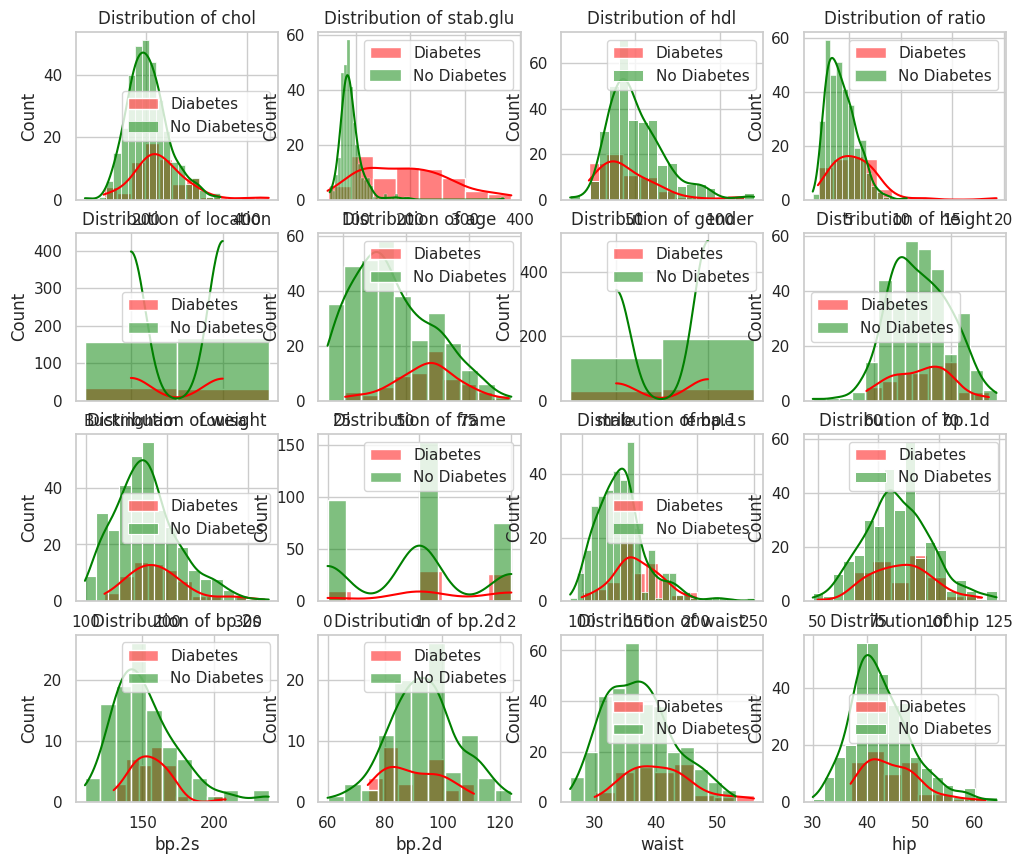

In [ ]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[df['diabetic'] == 1][col], kde=True, label='Diabetes', color='red')
    sns.histplot(df[df['diabetic'] == 0][col], kde=True, label='No Diabetes', color='green')
    plt.title(f"Distribution of {col}")
    plt.legend()
plt.tight_layout()
plt.show()

##Imputation (Based on overall data or diabetic group???)

Investigate chol, hdl and ratio to choose a suitable imputation technique.

Their boxplots show right-skewness with a few plausible outliers.

Mean is not robust to outlier, so use median.

In [ ]:
medians_by_diabetic = df.groupby('diabetic')[['chol', 'ratio', 'hdl']].median()

df['chol'] = df.apply(lambda row: medians_by_diabetic.loc[row['diabetic']]['chol'] if pd.isna(row['chol']) else row['chol'], axis=1)
df['hdl'] = df.apply(lambda row: medians_by_diabetic.loc[row['diabetic']]['hdl'] if pd.isna(row['hdl']) else row['hdl'], axis=1)
df['ratio'] = df.apply(lambda row: medians_by_diabetic.loc[row['diabetic']]['chol']/row['hdl'] if pd.isna(row['ratio']) else row['ratio'], axis=1)


In [ ]:
df.isnull().sum()

chol         0
stab.glu     0
hdl          0
ratio        0
location     0
age          0
gender       0
height       5
weight       1
frame       11
bp.1s        5
bp.1d        5
waist        2
hip          2
time.ppn     3
diabetic     0
dtype: int64

Now predict weight using hip and waist with Linear Regression

In [ ]:
features = ['hip', 'waist']
target = 'weight'
df_impute = df.copy()

df_impute = df_impute.dropna(subset=['hip', 'waist'])

df_missing_weight = df_impute[df_impute['weight'].isna()]
df_not_missing_weight = df_impute[~df_impute['weight'].isna()]

model = LinearRegression()
model.fit(df_not_missing_weight[features], df_not_missing_weight[target])


predicted_weights = model.predict(df_missing_weight[features])

df.loc[df['weight'].isna(), 'weight'] = predicted_weights

In [ ]:
df.isnull().sum()

chol         0
stab.glu     0
hdl          0
ratio        0
location     0
age          0
gender       0
height       5
weight       0
frame       11
bp.1s        5
bp.1d        5
waist        2
hip          2
time.ppn     3
diabetic     0
dtype: int64

Now predict hip and waist using weight

In [ ]:
features = ['weight']
targets = ['hip', 'waist']

df_impute = df.copy()

df_missing_values = df_impute[df_impute[targets].isna().any(axis=1)]
df_not_missing_values = df_impute[~df_impute[targets].isna().any(axis=1)]

models = {}
for target in targets:
    model = LinearRegression()
    model.fit(df_not_missing_values[features], df_not_missing_values[target])
    models[target] = model

for target in targets:
    predicted_values = models[target].predict(df_missing_values[features])
    df.loc[df[targets].isna().any(axis=1), target] = predicted_values

In [ ]:
df.isnull().sum()

chol         0
stab.glu     0
hdl          0
ratio        0
location     0
age          0
gender       0
height       5
weight       0
frame       11
bp.1s        5
bp.1d        5
waist        0
hip          0
time.ppn     3
diabetic     0
dtype: int64

Investigate bp.1d, bp.1s and time.ppn to choose a suitable imputation technique.

The two boxplots show right-skewness with a few plausible outliers. (Slight skewness for bp.1d)

Mean is not robust to outlier, so use median. Cannot use regression as missing values come in pairs

In [ ]:
df["bp.1s"].replace(to_replace=np.nan,value=df["bp.1s"].median(), inplace=True)
df["bp.1d"].replace(to_replace=np.nan,value=df["bp.1d"].median(), inplace=True)
df["time.ppn"].replace(to_replace=np.nan,value=df["time.ppn"].median(), inplace=True)

In [ ]:
df.isnull().sum()

chol         0
stab.glu     0
hdl          0
ratio        0
location     0
age          0
gender       0
height       5
weight       0
frame       11
bp.1s        0
bp.1d        0
waist        0
hip          0
time.ppn     0
diabetic     0
dtype: int64

Impute height based on median height of each gender.

In [ ]:
median_height_by_gender = df.groupby("gender")["height"].median()

def impute_height(row):
    if pd.notna(row["height"]):
        return row["height"]
    gender = row["gender"]
    return median_height_by_gender[gender]


df["height"] = df.apply(impute_height, axis=1)


In [ ]:
df.isnull().sum()

chol         0
stab.glu     0
hdl          0
ratio        0
location     0
age          0
gender       0
height       0
weight       0
frame       11
bp.1s        0
bp.1d        0
waist        0
hip          0
time.ppn     0
diabetic     0
dtype: int64

##Frame Imputation using Decision Tree


In [ ]:
# Variables used to predict frame
# gender, height, weight, waist, hip
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

features = ['gender','height','weight','hip', 'waist']
target = 'frame'
df_impute = df.copy()
df_impute['gender'] = df_impute['gender'].apply(lambda x: 1 if x =='male' else 0) # convert gender string to numerical


df_missing_frame = df_impute[df_impute['frame'].isna()]
df_not_missing_frame = df_impute[~df_impute['frame'].isna()]

model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(df_not_missing_frame[features], df_not_missing_frame[target])

#Predict the response for test dataset
predicted_frame = model.predict(df_missing_frame[features])
print(df_missing_frame[features])
print(predicted_frame)

df.loc[df['frame'].isna(), 'frame'] = predicted_frame

     gender  height  weight   hip  waist
49        1    65.0   154.0  41.0   37.0
61        0    63.0   125.0  35.0   31.0
66        0    61.0   127.0  38.0   35.0
105       1    70.0   165.0  41.0   39.0
106       1    70.0   212.0  44.0   39.0
146       1    66.0   163.0  43.0   37.0
216       0    61.0   180.0  47.0   39.0
273       0    61.0   185.0  47.0   43.0
321       0    63.0   245.0  58.0   47.0
337       0    71.0   183.0  45.0   41.0
369       0    56.0   120.0  41.0   32.0
['small' 'medium' 'small' 'medium' 'large' 'small' 'medium' 'small'
 'medium' 'small' 'small']


In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=features,
                                class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

## Save cleaned data

In [ ]:
df.isnull().sum()

chol        0
stab.glu    0
hdl         0
ratio       0
location    0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
waist       0
hip         0
time.ppn    0
diabetic    0
dtype: int64

In [ ]:
df.to_csv('/content/gdrive/My Drive/WQD7001-Principles of Data Science/df.csv', index=False)

In [ ]:
df.to_csv('/content/gdrive/My Drive/WQD 7001/df.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import plotly.graph_objects as go #
import plotly.express as px
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from google.colab import drive
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'turbo', 'twilight']
import scipy.stats as stats
%matplotlib inline
from scipy.stats import chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm
import scipy.stats.distributions as dist

In [ ]:
# for YS' directory
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/WQD 7001

Mounted at /content/gdrive
/content/gdrive/My Drive/WQD 7001


In [ ]:
# for JUSTIN's directory !!!
%cd /content/gdrive/My Drive/WQD7001-Principles of Data Science

[Errno 2] No such file or directory: '/content/gdrive/My Drive/WQD7001-Principles of Data Science'
/content


## Final EDA

Boxplots

In [ ]:
columns_to_exclude = ['location', 'gender', 'frame','diabetic']
filtered_columns = [col for col in df.columns if col not in columns_to_exclude]


plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
for col in filtered_columns:
    plt.subplot(3, 4, filtered_columns.index(col) + 1)
    sns.boxplot(data=df, y=col, orient="v", width=0.5)
    plt.title(f'Boxplot of {col}')
    plt.savefig("Boxplots.pdf", format="pdf")
    plt.tight_layout()

plt.show()

NameError: name 'df' is not defined

ValueError: num must be an integer with 1 <= num <= 12, not 13

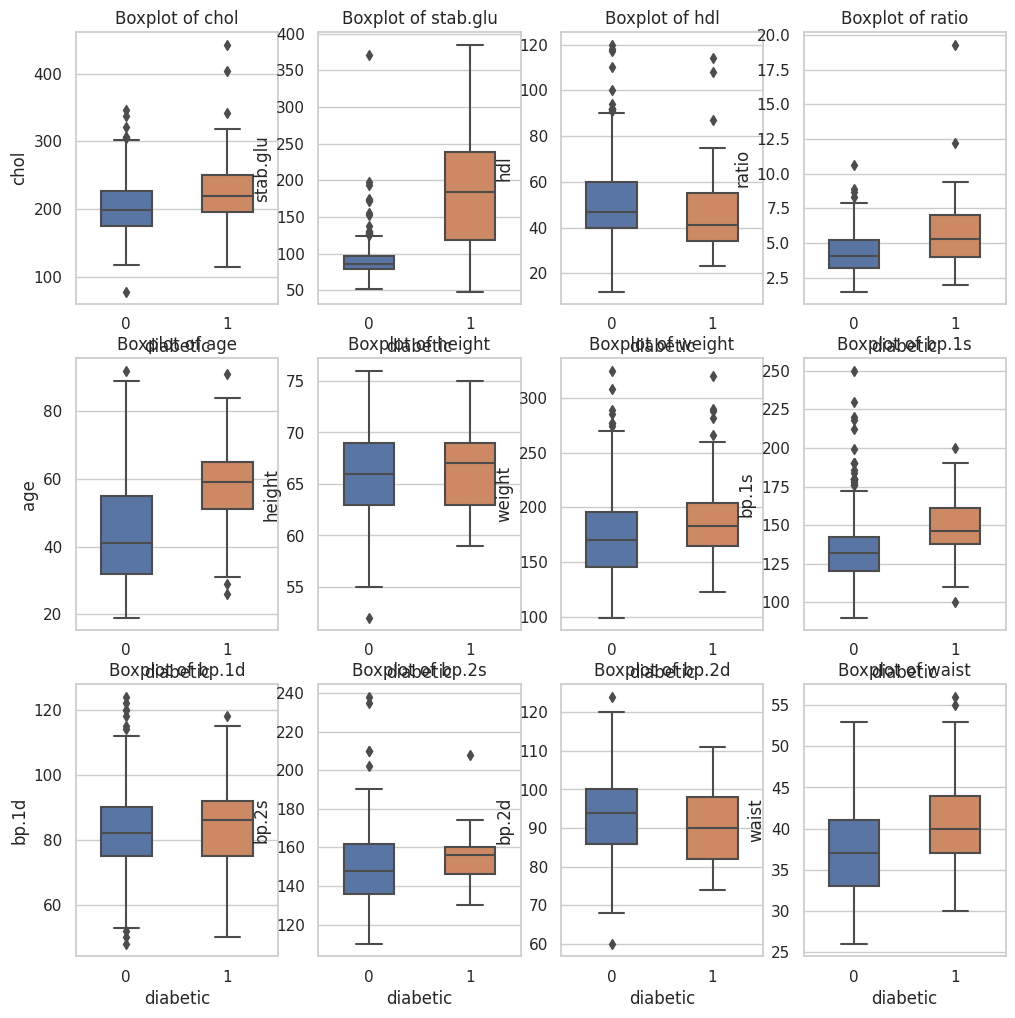

In [ ]:
columns_to_exclude = ['location', 'gender', 'frame', 'diabetic']
filtered_columns = [col for col in df.columns if col not in columns_to_exclude]

plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")

for i, col in enumerate(filtered_columns):
    plt.subplot(3, 4, i + 1)


    sns.boxplot(x="diabetic", y=col, data=df, width=0.5)


    plt.title(f'Boxplot of {col}')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.savefig("Boxplots_pair.pdf", format="pdf")

plt.tight_layout()

plt.show()

Histogram according to Diabetic status

ValueError: num must be an integer with 1 <= num <= 12, not 13

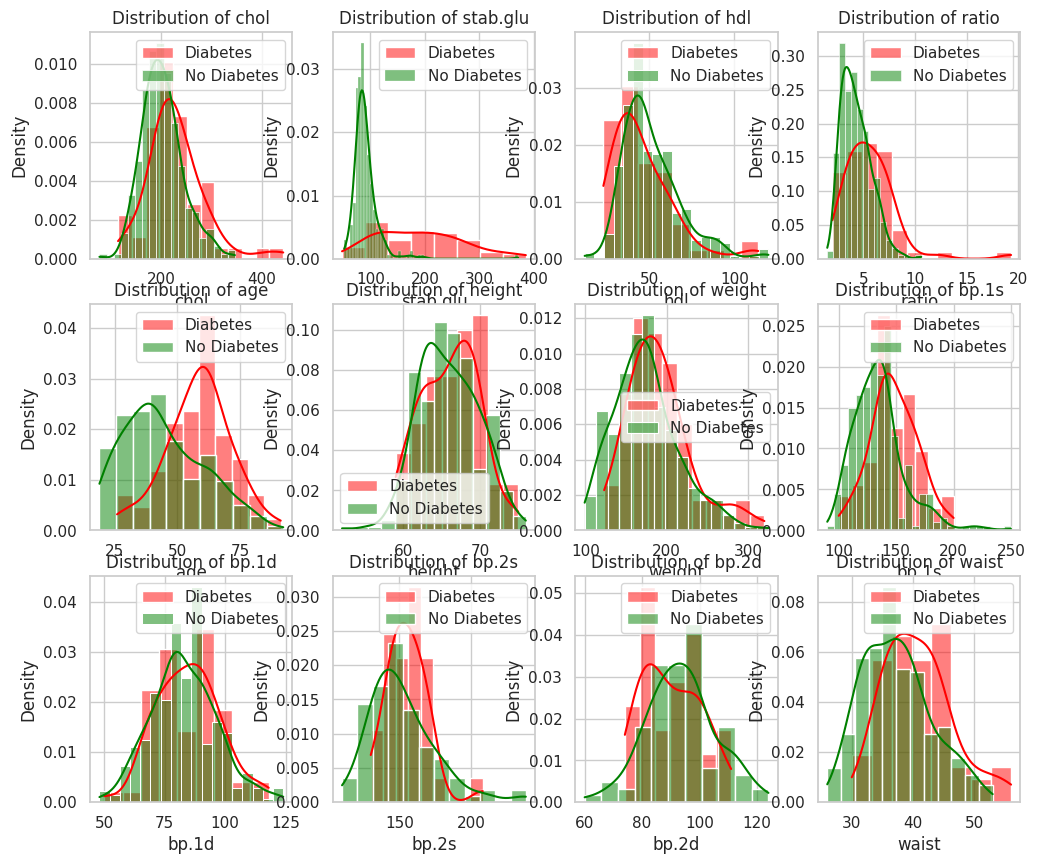

In [ ]:
attributes_to_exclude = ['location', 'gender', 'frame']

df_filtered = df.drop(attributes_to_exclude, axis=1)

plt.figure(figsize=(12, 10))
for i, col in enumerate(df_filtered.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_filtered[df_filtered['diabetic'] == 1][col], kde=True, label='Diabetes', color='red', stat = 'density')
    sns.histplot(df_filtered[df_filtered['diabetic'] == 0][col], kde=True, label='No Diabetes', color='green',stat = 'density')
    plt.title(f"Distribution of {col}")
    plt.legend()
plt.tight_layout()
plt.savefig("Histograms.pdf", format="pdf")
plt.show()


Pairwise Plots

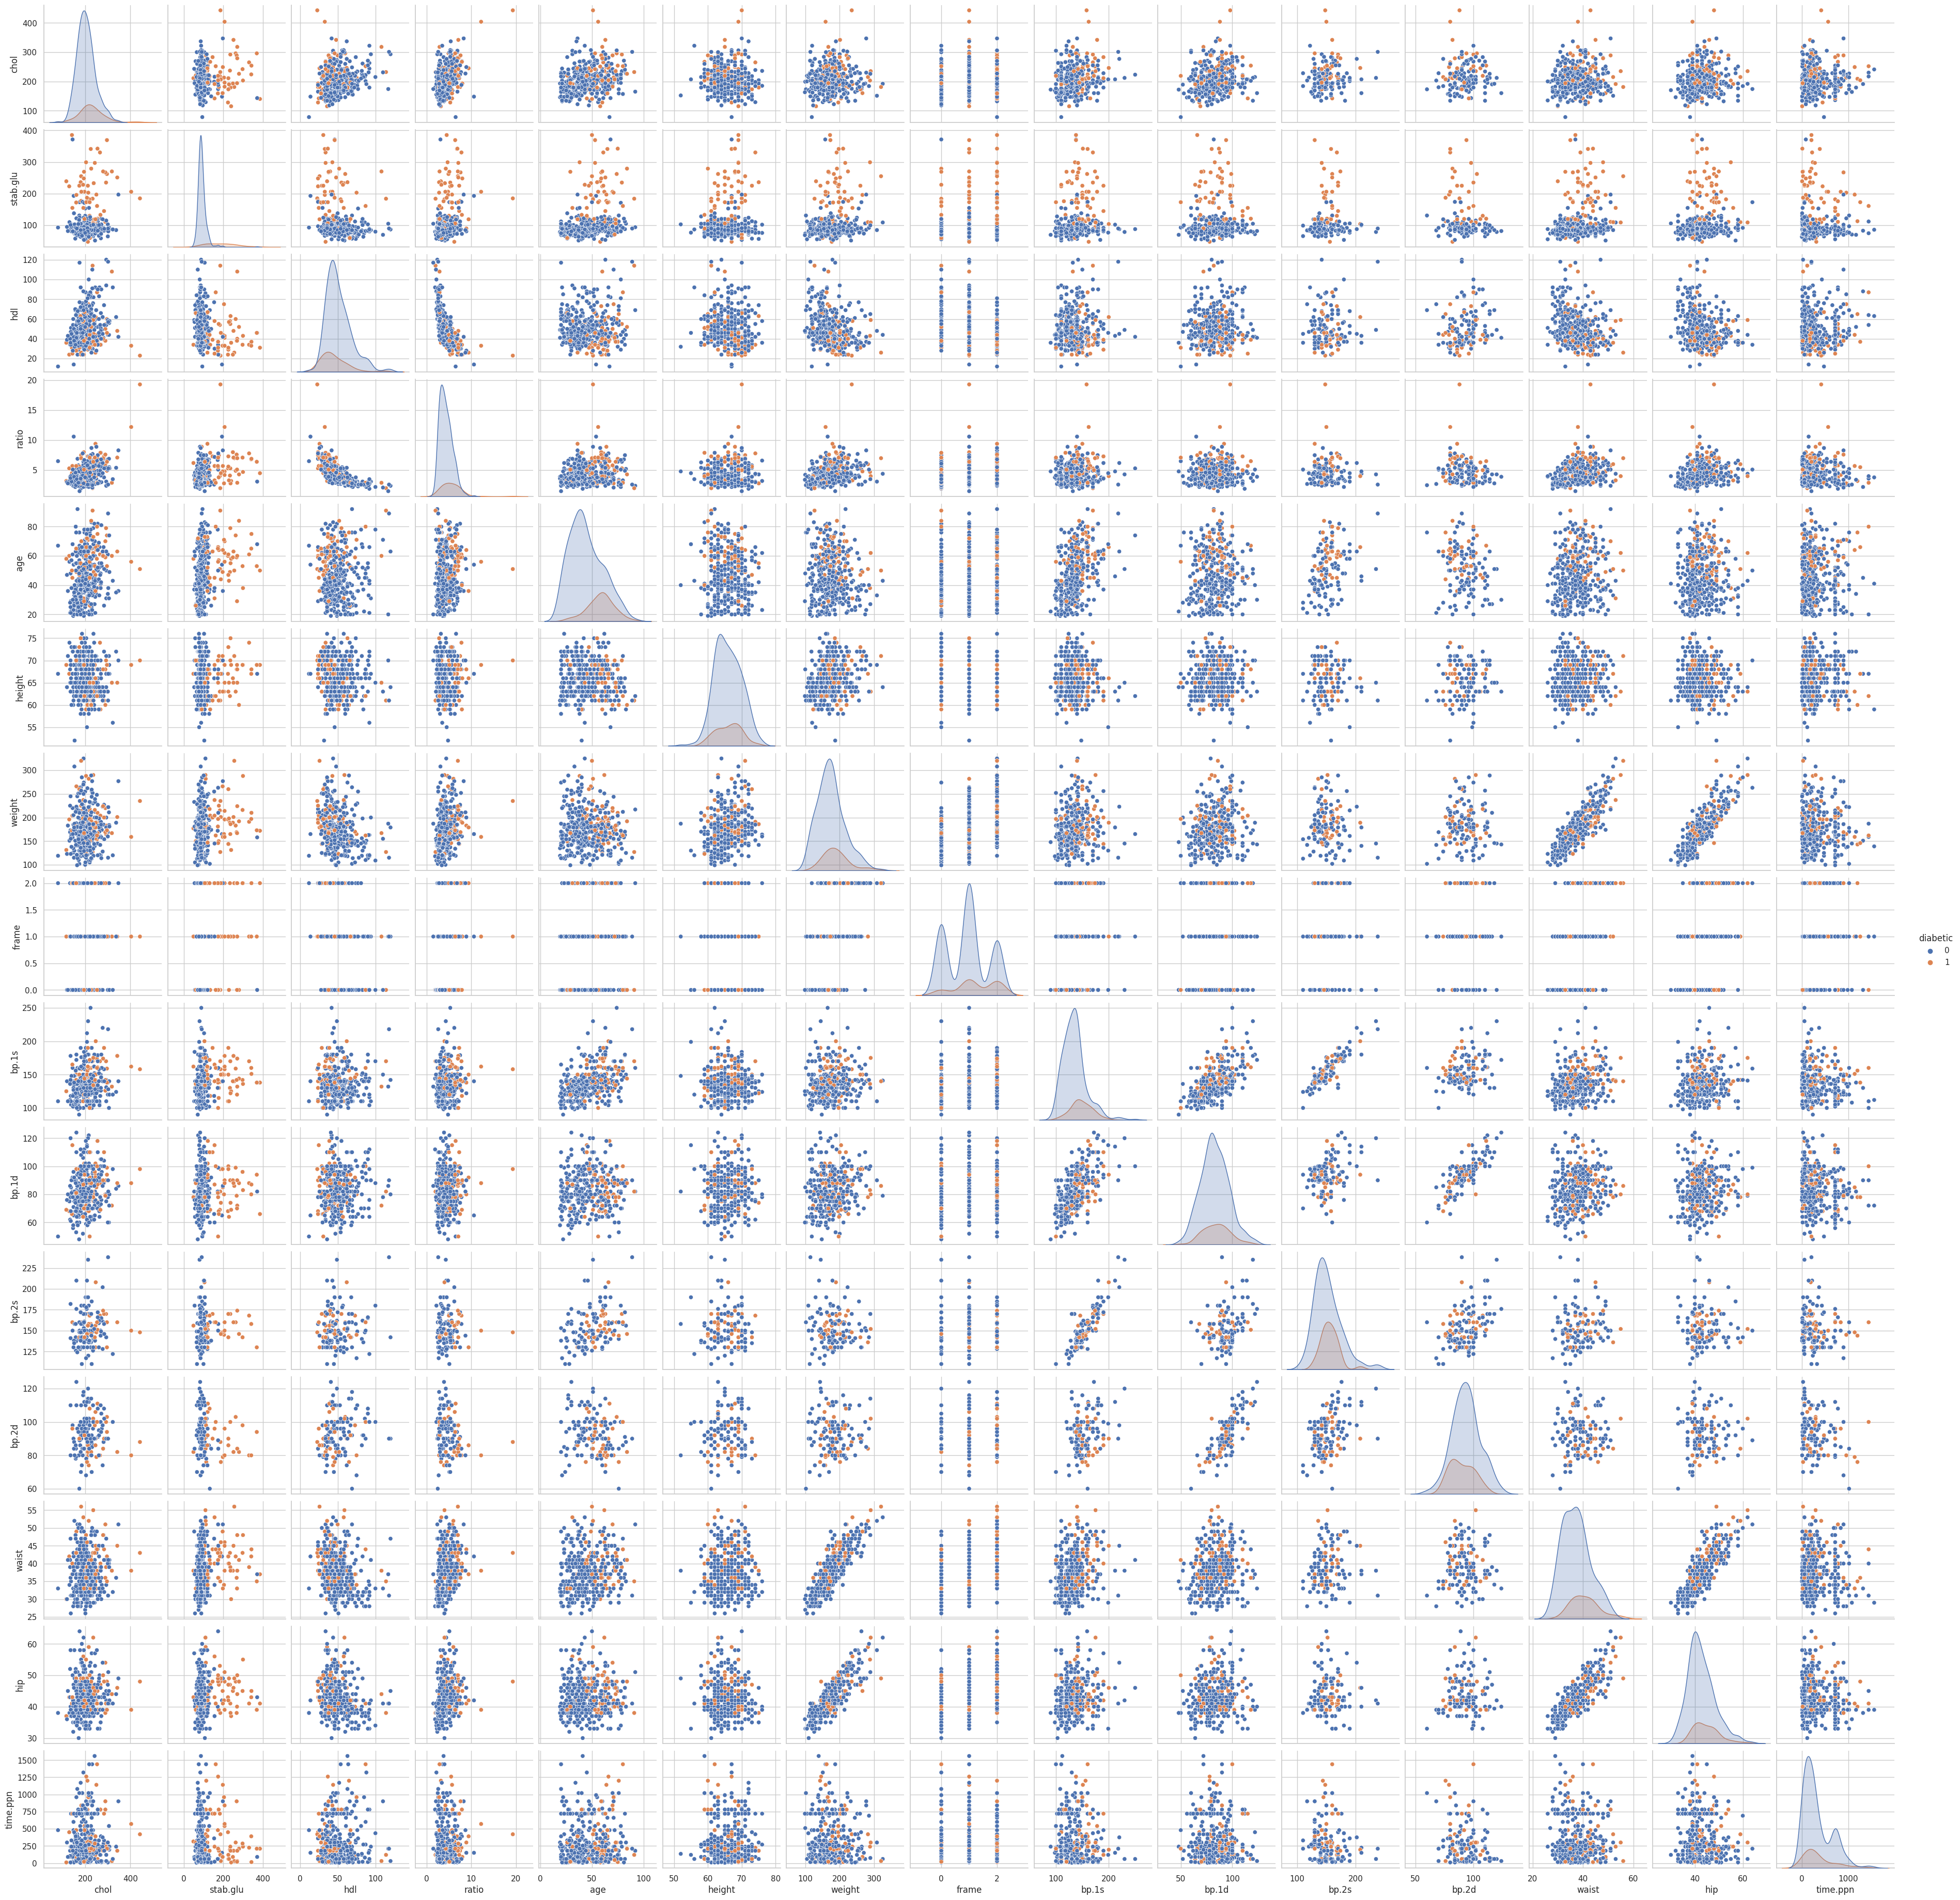

In [ ]:
pp=sns.pairplot(df,hue='diabetic')
pp
#pp.figure.savefig("Pairwise_plots.pdf", format="pdf")

In [ ]:
kde=sns.pairplot(df, kind="kde")
kde
kde.figure.savefig("kde_plots.pdf", format="pdf")

In [ ]:
corrMatrix = df.loc[:, df.columns != 'diabetic'].corr()
sns.clustermap(corrMatrix, annot = True, fmt = ".3f")
plt.title("Correlation Between Features")
plt.savefig("Correlations.pdf", format="pdf", bbox_inches = 'tight')
plt.show()

In [ ]:
df.groupby('diabetic').mean().T

<ipython-input-26-b11e12065abe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('diabetic').mean().T


diabetic           0           1
chol      202.941538  228.815385
stab.glu   90.889231  189.584615
hdl        51.212308   45.492308
ratio       4.303797    5.635385
age        44.443077   58.430769
height     65.916923   66.092308
weight    174.566154  190.558825
bp.1s     134.920000  148.200000
bp.1d      82.972308   84.753846
waist      37.297515   40.769231
hip        42.659471   44.784615
time.ppn  330.000000  362.307692

In [ ]:
df.groupby('diabetic').median().T

<ipython-input-30-ba569d11ae29>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('diabetic').median().T


diabetic      0      1
chol      199.0  219.0
stab.glu   86.0  184.0
hdl        47.0   41.0
ratio       4.1    5.3
age        41.0   59.0
height     66.0   67.0
weight    170.0  183.0
bp.1s     132.0  146.0
bp.1d      82.0   86.0
bp.2s     148.0  156.0
bp.2d      94.0   90.0
waist      37.0   40.0
hip        42.0   44.0
time.ppn  240.0  240.0

In [ ]:
df.groupby('diabetic').var().T

<ipython-input-31-3c7627e80048>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('diabetic').var().T


diabetic             0              1
chol       1650.407066    3200.809135
stab.glu    615.246952    6232.746635
hdl         287.031947     334.097596
ratio         2.027314       6.560134
age         259.049991     164.905288
height       15.638139      13.960096
weight     1607.499468    1594.900231
bp.1s       515.882469     412.475000
bp.1d       183.866515     173.500962
bp.2s       549.362088     223.979167
bp.2d       141.690842     103.835227
waist        31.648899      30.899038
hip          31.922374      28.015385
time.ppn  91360.956790  112544.591346

In [ ]:
df.groupby('diabetic').std().T

<ipython-input-32-7a6f2e323845>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('diabetic').std().T


diabetic           0           1
chol       40.625202   56.575694
stab.glu   24.804172   78.947746
hdl        16.942017   18.278337
ratio       1.423838    2.561276
age        16.095030   12.841545
height      3.954509    3.736321
weight     40.093634   39.936202
bp.1s      22.713046   20.309481
bp.1d      13.559739   13.171976
bp.2s      23.438475   14.965934
bp.2d      11.903396   10.189957
waist       5.625735    5.558690
hip         5.649989    5.292956
time.ppn  302.259751  335.476663

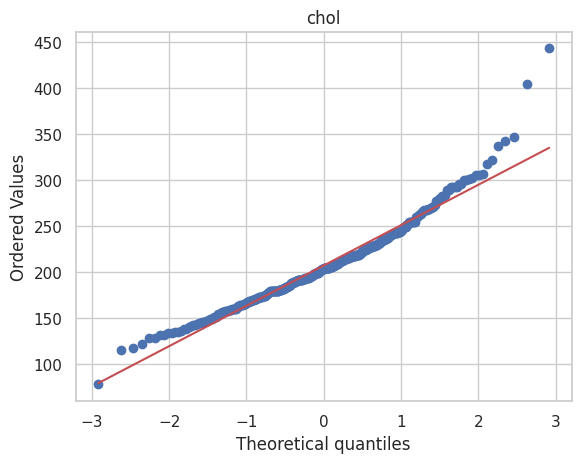

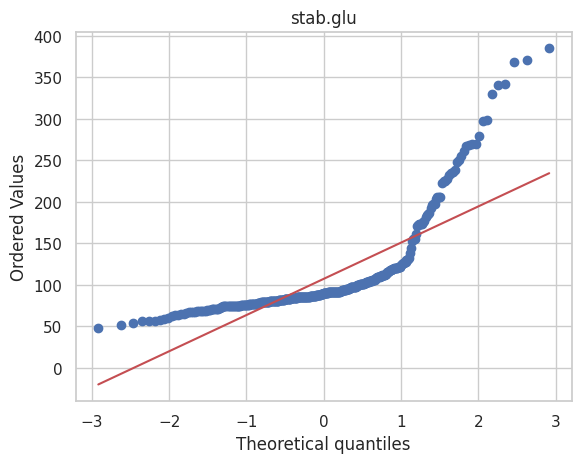

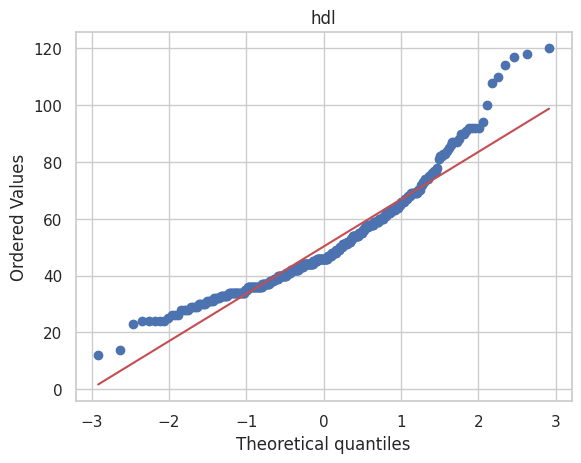

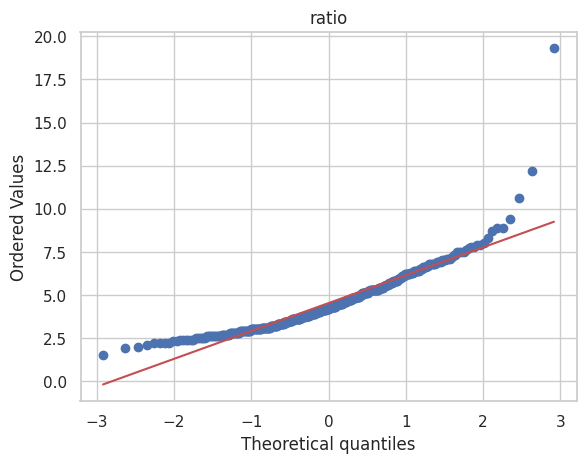

Type Error


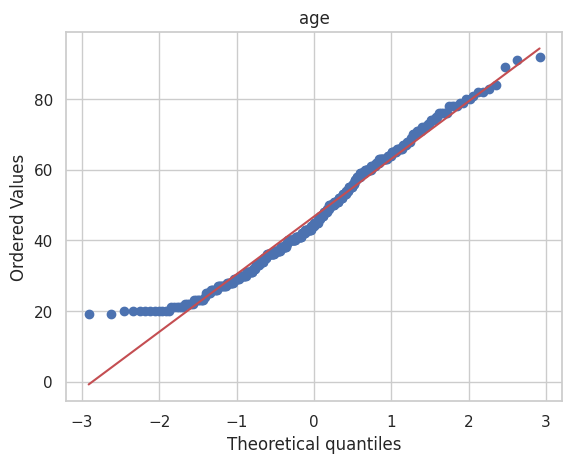

Type Error


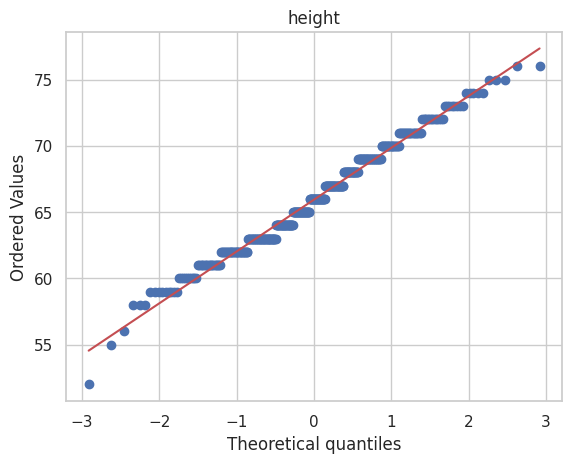

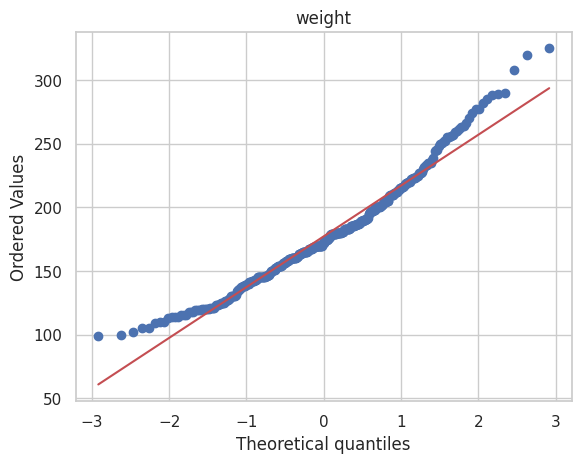

Type Error


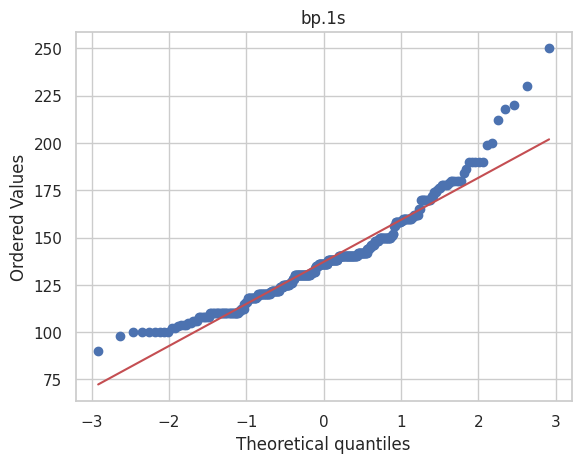

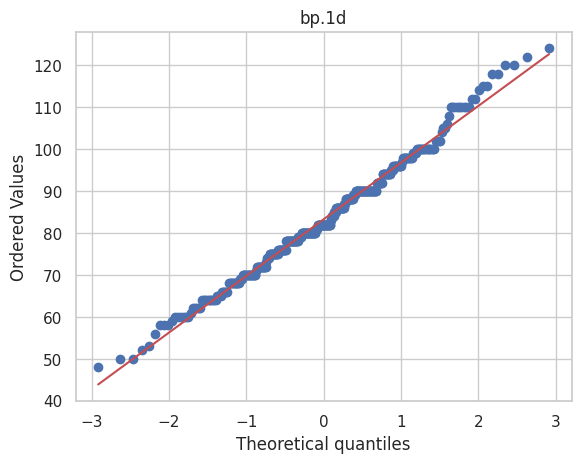

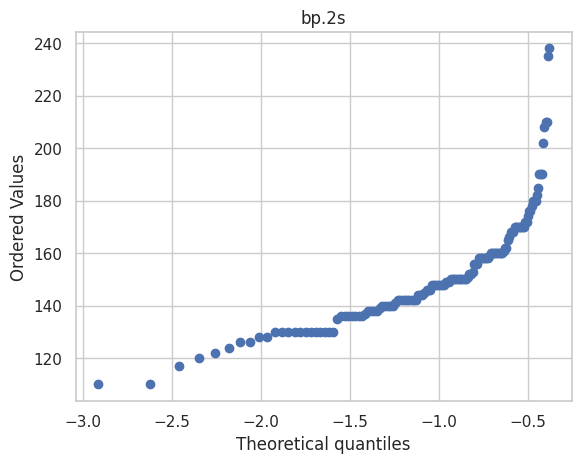

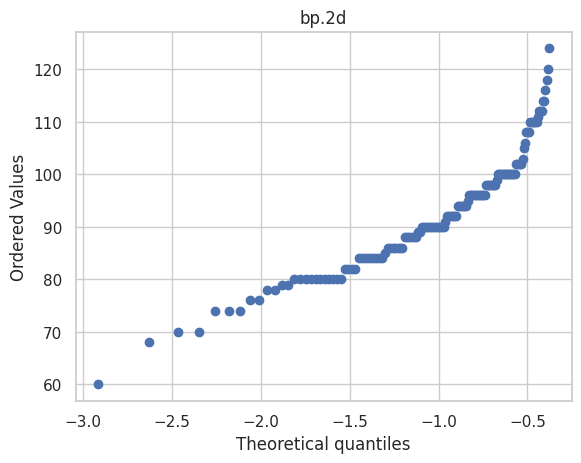

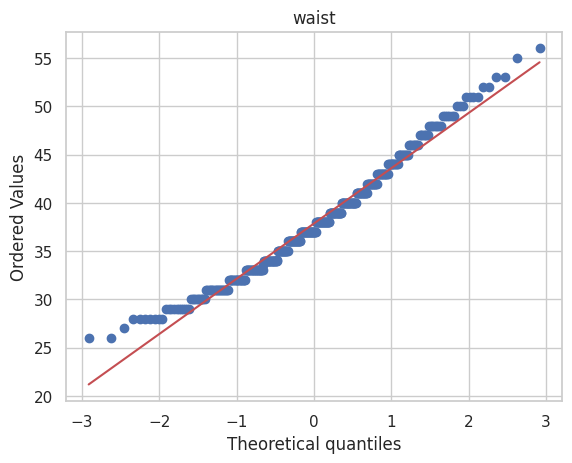

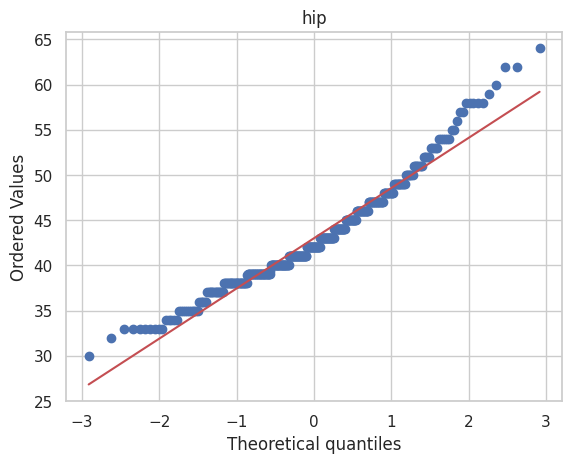

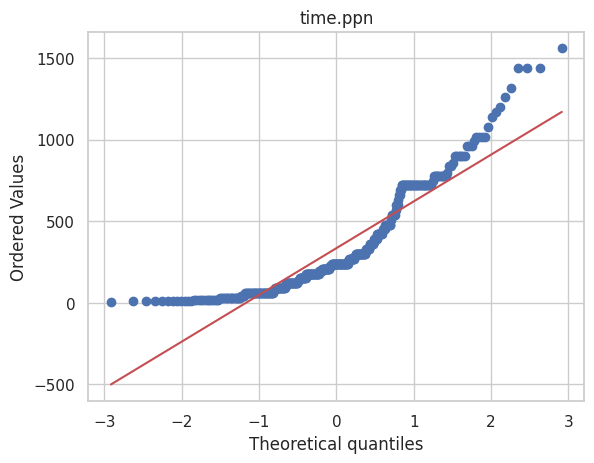

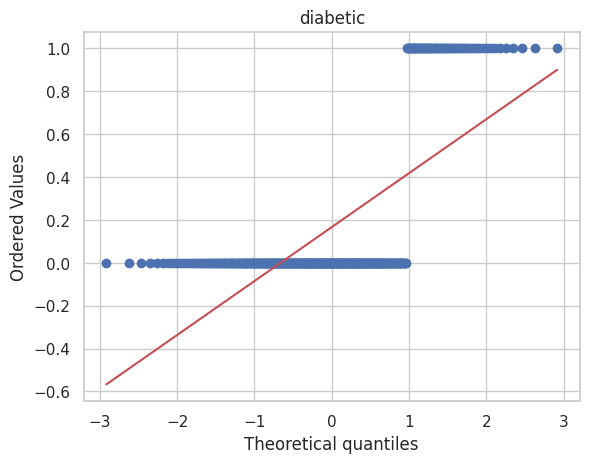

In [ ]:
for i in df.columns:
    if(i != 'location' and i != 'gender' and i != 'frame'):
      plt.figure()
      stats.probplot(df[i], plot = plt)

      plt.title(i)
      plt.show()

    else:
      print("Type Error")

ValueError: num must be an integer with 1 <= num <= 12, not 13

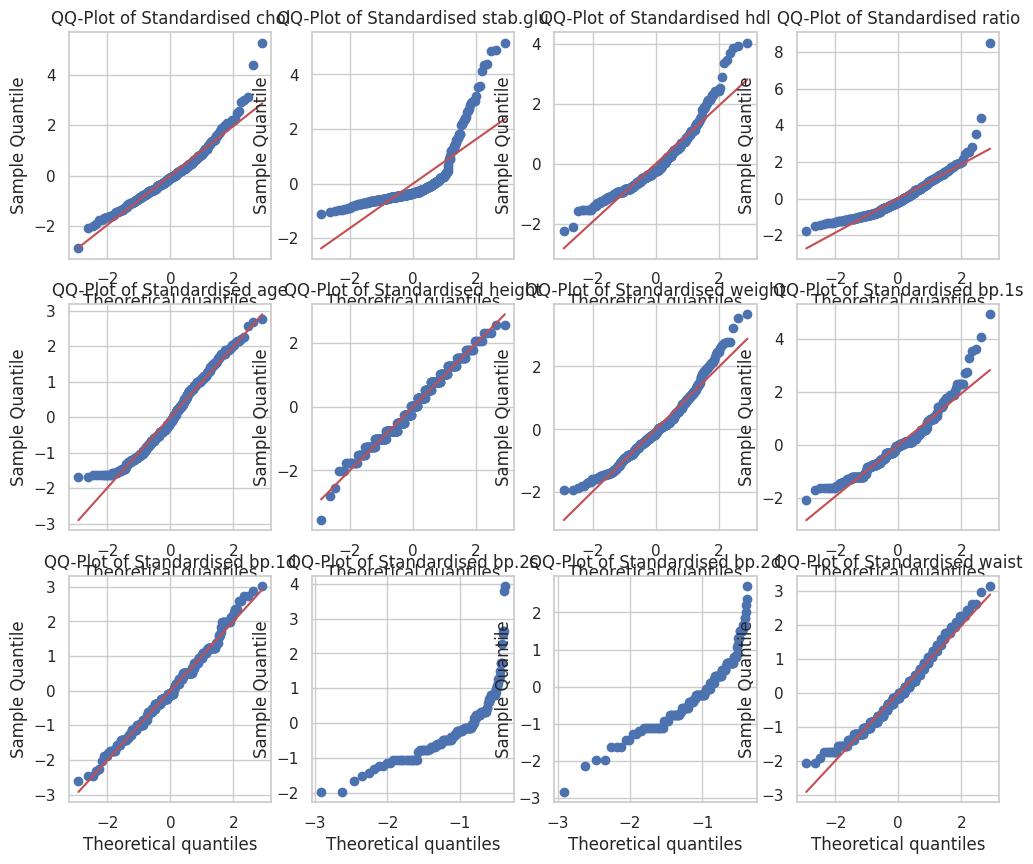

In [ ]:
attributes_to_exclude = ['location', 'gender', 'frame']

df_filtered = df.drop(attributes_to_exclude, axis=1)

plt.figure(figsize=(12, 10))
for i, col in enumerate(df_filtered.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    stats.probplot((df_filtered[col]-np.mean(df_filtered[col]))/np.std(df_filtered[col]), plot=plt)
    plt.title(f"QQ-Plot of Standardised {col}")
    plt.ylabel("Sample Quantile")

plt.tight_layout()
plt.savefig("QQPlots.pdf", format="pdf")
plt.show()

In [ ]:
from scipy.stats import norm, skew

skewed_feats = df.skew(0).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["Skewed"])
skewness.T

<ipython-input-40-9579500683db>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewed_feats = df.skew(0).sort_values(ascending = False)


stab.glu    ratio  diabetic  time.ppn       hdl   bp.2s     bp.1s  \
Skewed  2.711121  2.24484  1.795769  1.283503  1.230114  1.1862  1.100286   

            chol      hip    weight     waist       age     bp.1d     bp.2d  \
Skewed  0.960777  0.80637  0.746538  0.475642  0.332907  0.250472  0.154115   

          height  
Skewed  0.040574

In [ ]:
df

chol  stab.glu    hdl  ratio    location  age  gender  height  weight  \
0    203.0        82   56.0    3.6  Buckingham   46  female    62.0   121.0   
1    165.0        97   24.0    6.9  Buckingham   29  female    64.0   218.0   
2    228.0        92   37.0    6.2  Buckingham   58  female    61.0   256.0   
3     78.0        93   12.0    6.5  Buckingham   67    male    67.0   119.0   
4    249.0        90   28.0    8.9  Buckingham   64    male    68.0   183.0   
..     ...       ...    ...    ...         ...  ...     ...     ...     ...   
385  301.0        90  118.0    2.6      Louisa   89  female    61.0   115.0   
386  296.0       369   46.0    6.4      Louisa   53    male    69.0   173.0   
387  284.0        89   54.0    5.3      Louisa   51  female    63.0   154.0   
388  194.0       269   38.0    5.1      Louisa   29  female    69.0   167.0   
389  199.0        76   52.0    3.8      Louisa   41  female    63.0   197.0   

      frame  bp.1s  bp.1d  waist   hip  time.ppn  diabetic  
0    medium  118.0   59.0   29.0  38.0     720.0         0  
1     large  112.0   68.0   46.0  48.0     360.0         0  
2     large  190.0   92.0   49.0  57.0     180.0         0  
3     large  110.0   50.0   33.0  38.0     480.0         0  
4    medium  138.0   80.0   44.0  41.0     300.0         1  
..      ...    ...    ...    ...   ...       ...       ...  
385  medium  218.0   90.0   31.0  41.0     210.0         0  
386  medium  138.0   94.0   35.0  39.0     210.0         1  
387  medium  140.0  100.0   32.0  43.0     180.0         0  
388   small  120.0   70.0   33.0  40.0      20.0         1  
389  medium  120.0   78.0   41.0  48.0     255.0         0  

[390 rows x 16 columns]

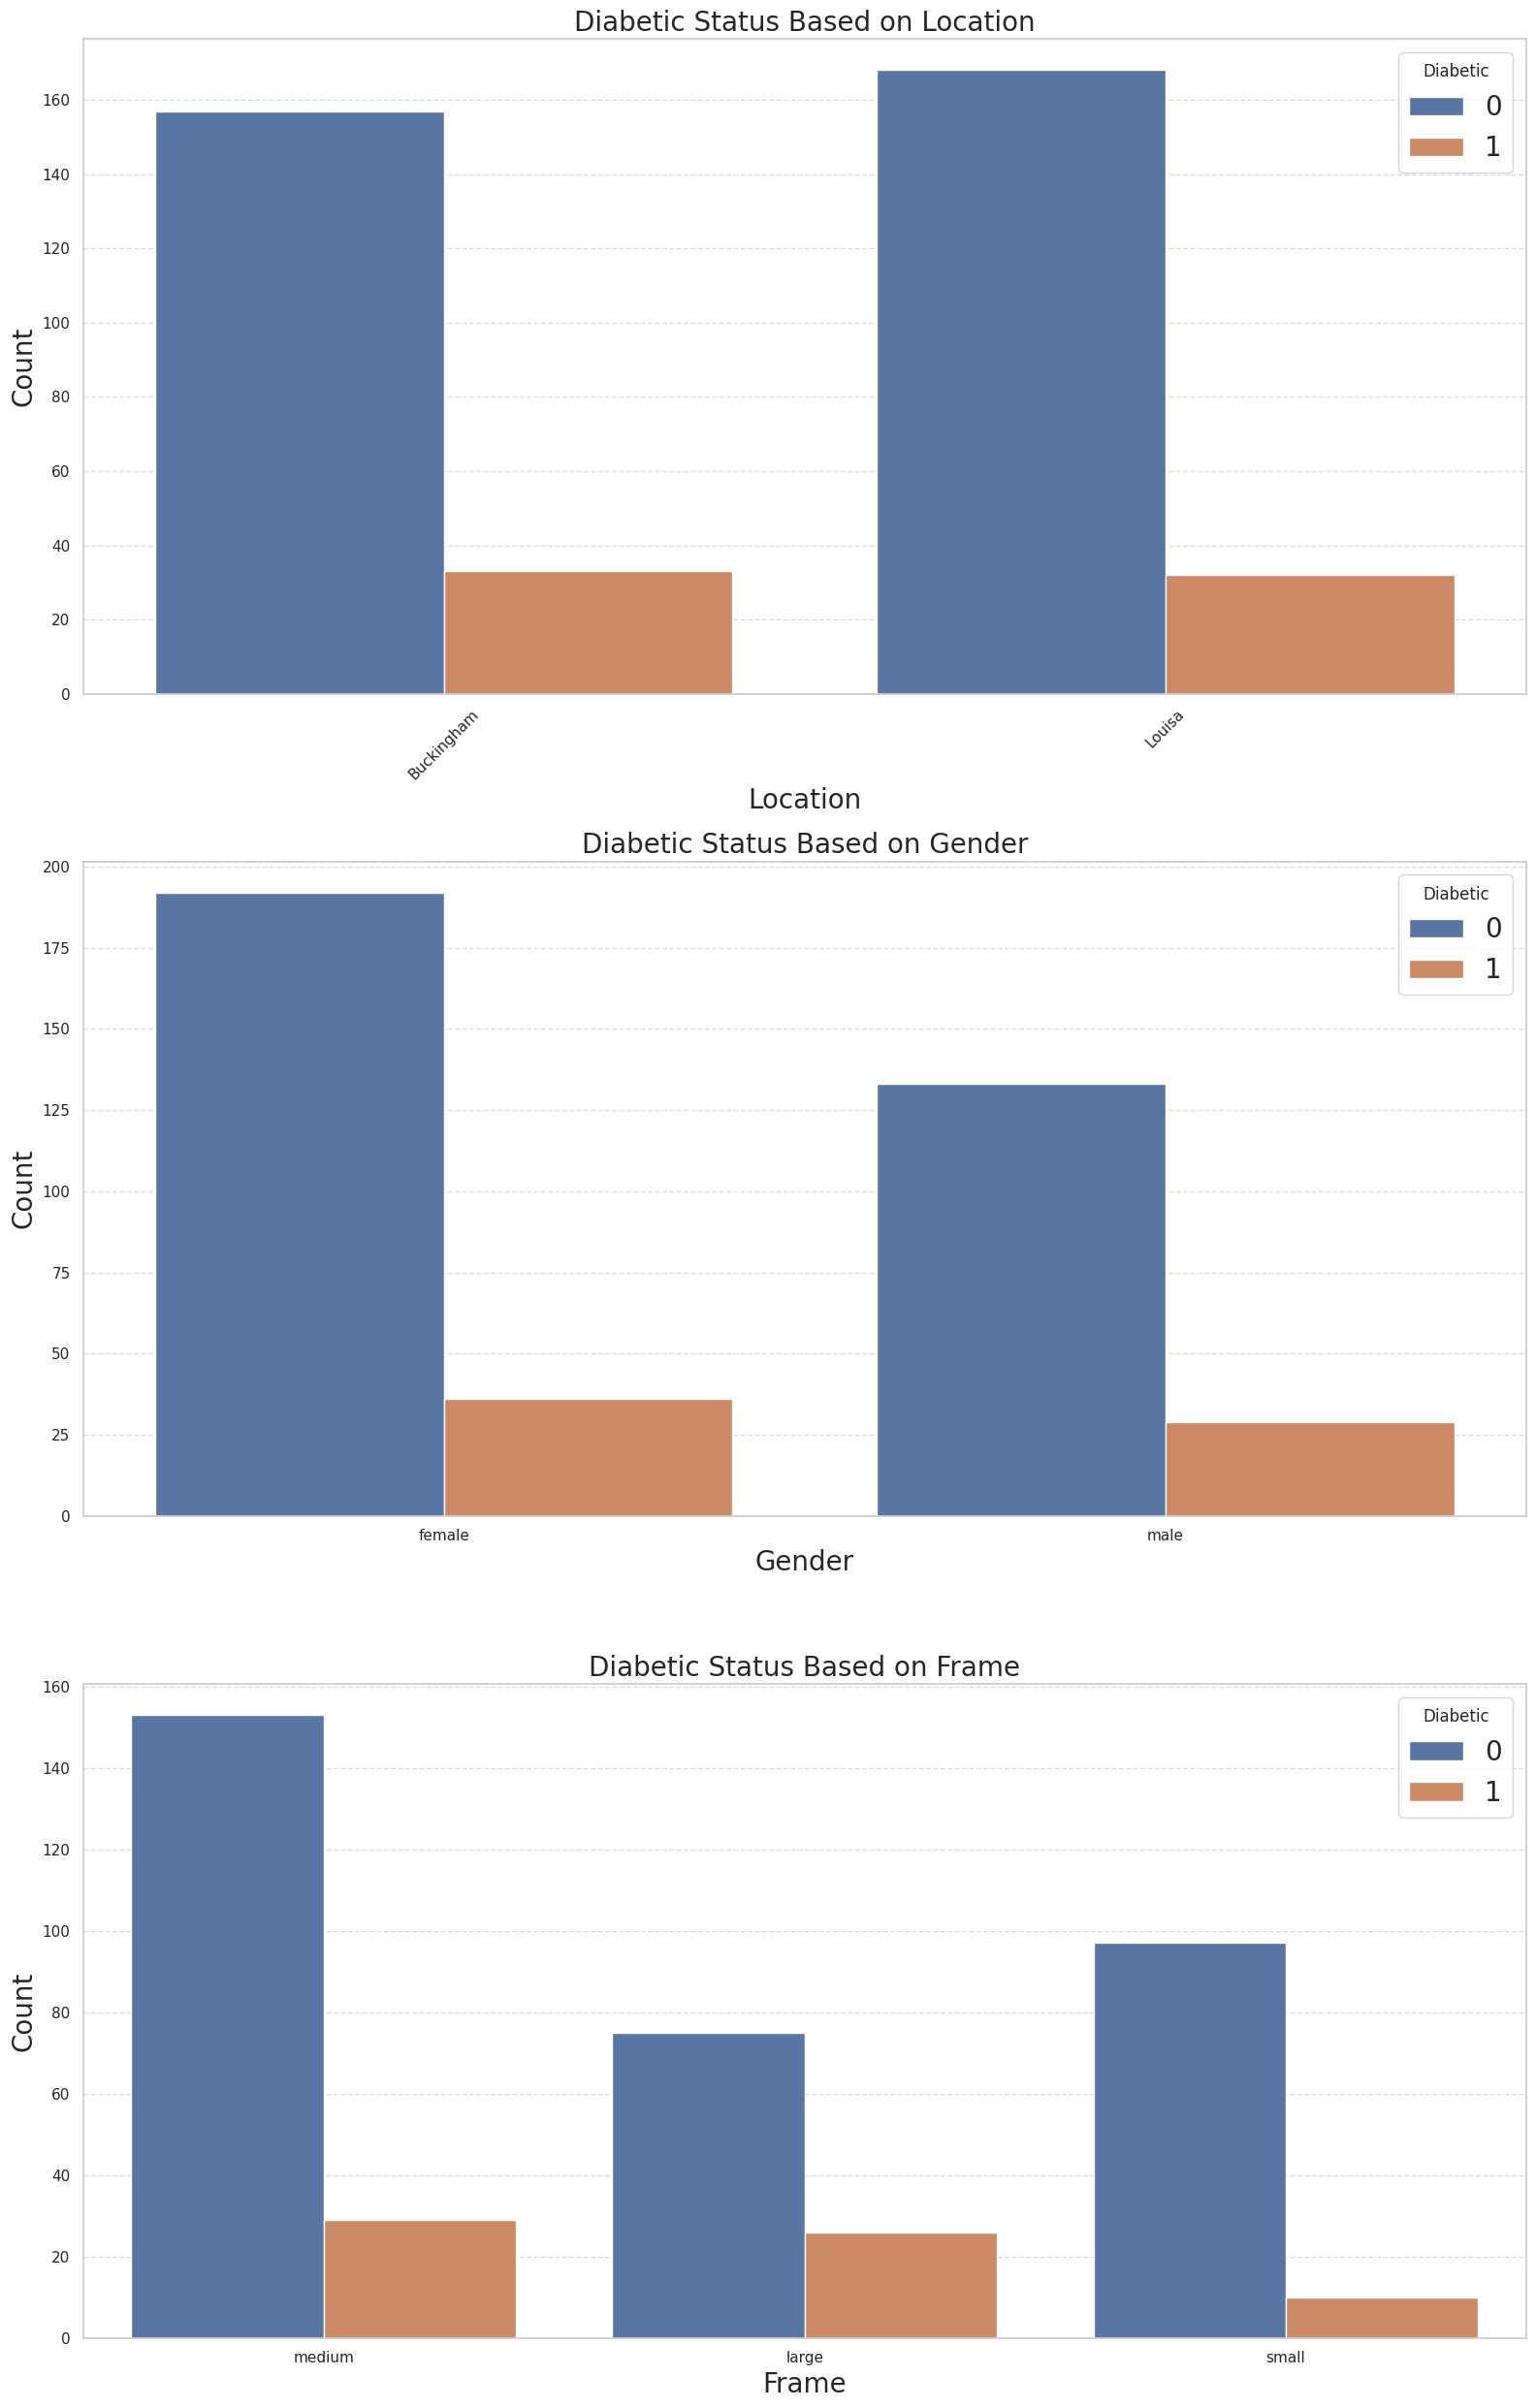

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(16, 25))

sns.countplot(x='location', hue='diabetic', data=df, ax=axes[0])
axes[0].set_title('Diabetic Status Based on Location', fontsize=20)
axes[0].set_xlabel('Location', fontsize=20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].legend(title='Diabetic', loc='upper right', fontsize=20)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='gender', hue='diabetic', data=df, ax=axes[1])
axes[1].set_title('Diabetic Status Based on Gender', fontsize=20)
axes[1].set_xlabel('Gender', fontsize=20)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].legend(title='Diabetic', loc='upper right', fontsize=20)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

sns.countplot(x='frame', hue='diabetic', data=df, ax=axes[2])
axes[2].set_title('Diabetic Status Based on Frame', fontsize=20)
axes[2].set_xlabel('Frame', fontsize=20)
axes[2].set_ylabel('Count', fontsize=20)
axes[2].legend(title='Diabetic', loc='upper right', fontsize=20)
axes[2].grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("Bar_charts.pdf", format="pdf")
plt.show()

In [ ]:
specific_attribute = 'stab.glu'
condition_column = 'diabetic'

# Filter rows where diabetic is 0
filtered_df = df[df[condition_column] == 0]

# Find the index of the row with the maximum value in the specified column
max_index = filtered_df[specific_attribute].idxmax()

# Extract the row corresponding to the maximum value
row_with_max_value = df.loc[max_index]

# Print the row
print("Row with the largest value in '{}' where '{} == 0':".format(specific_attribute, condition_column))
print(row_with_max_value)


Row with the largest value in 'stab.glu' where 'diabetic == 0':
chol         143.0
stab.glu       371
hdl           46.0
ratio          3.1
location    Louisa
age             68
gender        male
height        67.0
weight       158.0
frame        small
bp.1s        138.0
bp.1d         82.0
bp.2s          NaN
bp.2d          NaN
waist         37.0
hip           43.0
time.ppn      90.0
diabetic         0
Name: 187, dtype: object


In [ ]:
location_proportions = df.groupby('location')['diabetic'].mean()

frame_proportions = df.groupby('frame')['diabetic'].mean()

gender_proportions = df.groupby('gender')['diabetic'].mean()

# Print results
print("Proportions of Diabetics based on Location:")
print(location_proportions)

print("\nProportions of Diabetics based on Frame:")
print(frame_proportions)

print("\nProportions of Diabetics based on Gender:")
print(gender_proportions)

Proportions of Diabetics based on Location:
location
Buckingham    0.173684
Louisa        0.160000
Name: diabetic, dtype: float64

Proportions of Diabetics based on Frame:
frame
large     0.257426
medium    0.159341
small     0.093458
Name: diabetic, dtype: float64

Proportions of Diabetics based on Gender:
gender
female    0.157895
male      0.179012
Name: diabetic, dtype: float64


In [ ]:
df.groupby('gender')['diabetic'].sum()

gender
female    36
male      29
Name: diabetic, dtype: int64

In [ ]:
female_count = df[df['gender'] == 'female'].shape[0]
female_count

228

In [ ]:
male_count = df[df['gender'] == 'male'].shape[0]
male_count

162

# Statistical Analyses and Tests

In [ ]:
df

chol  stab.glu    hdl  ratio    location  age  gender  height  weight  \
0    203.0        82   56.0    3.6  Buckingham   46  female    62.0   121.0   
1    165.0        97   24.0    6.9  Buckingham   29  female    64.0   218.0   
2    228.0        92   37.0    6.2  Buckingham   58  female    61.0   256.0   
3     78.0        93   12.0    6.5  Buckingham   67    male    67.0   119.0   
4    249.0        90   28.0    8.9  Buckingham   64    male    68.0   183.0   
..     ...       ...    ...    ...         ...  ...     ...     ...     ...   
385  301.0        90  118.0    2.6      Louisa   89  female    61.0   115.0   
386  296.0       369   46.0    6.4      Louisa   53    male    69.0   173.0   
387  284.0        89   54.0    5.3      Louisa   51  female    63.0   154.0   
388  194.0       269   38.0    5.1      Louisa   29  female    69.0   167.0   
389  199.0        76   52.0    3.8      Louisa   41  female    63.0   197.0   

      frame  bp.1s  bp.1d  waist   hip  time.ppn  diabetic  
0    medium  118.0   59.0   29.0  38.0     720.0         0  
1     large  112.0   68.0   46.0  48.0     360.0         0  
2     large  190.0   92.0   49.0  57.0     180.0         0  
3     large  110.0   50.0   33.0  38.0     480.0         0  
4    medium  138.0   80.0   44.0  41.0     300.0         1  
..      ...    ...    ...    ...   ...       ...       ...  
385  medium  218.0   90.0   31.0  41.0     210.0         0  
386  medium  138.0   94.0   35.0  39.0     210.0         1  
387  medium  140.0  100.0   32.0  43.0     180.0         0  
388   small  120.0   70.0   33.0  40.0      20.0         1  
389  medium  120.0   78.0   41.0  48.0     255.0         0  

[390 rows x 16 columns]

##Proportion Tests and $\chi^2$ Test on Categorical Variables.

On Gender. No Significant Difference.

In [ ]:
female_count = df[df['gender'] == 'female'].shape[0]
male_count = df[df['gender'] == 'male'].shape[0]

female_diab, male_diab=df.groupby('gender')['diabetic'].sum()

def z_test_2_sample_proportions(x1, x2, n1, n2, two_tailed=True):

    avg_p = (x1 + x2) / (n1 + n2)
    z_val = (x1/n1 - x2/n2) / np.sqrt(avg_p * (1-avg_p) * (1/n1 + 1/n2))
    z_prob = dist.norm.cdf(-np.abs(z_val))

    if two_tailed:
        return z_val, 2*z_prob
    else:
        return z_val, z_prob

z_test_2_sample_proportions(female_diab,male_diab,female_count,male_count, two_tailed=True)

(-0.5514467945790074, 0.5813274300175746)

On Location.No Significant Difference.

In [ ]:
Louisa_count = df[df['location'] == 'Louisa'].shape[0]
Buckingham_count = df[df['location'] == 'Buckingham'].shape[0]


Buck_diab, Loui_diab=df.groupby('location')['diabetic'].sum()

z_test_2_sample_proportions(Buck_diab,Loui_diab,Buckingham_count,Louisa_count, two_tailed = True)

(0.36244781838580814, 0.717017411190141)

On Body Frame. Use $\chi ^2$ test on contingency. Significant Association. Approximation is ok as $E_i >5$.

In [ ]:
contingency_table = pd.crosstab(df['frame'], df['diabetic'])
chi2, p, _, _ = chi2_contingency(contingency_table)


print("Contingency Table:")
print(contingency_table)


print("\nChi-squared test results:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

alpha=0.05
if p < alpha:
    print("There is a statistically significant association between 'frame' and 'diabetes.'")
else:
    print("There is no statistically significant association between 'frame' and 'diabetes.'")


Contingency Table:
diabetic    0   1
frame            
large      75  26
medium    153  29
small      97  10

Chi-squared test results:
Chi-squared statistic: 10.189400642847483
P-value: 0.00612914313254416
There is a statistically significant association between 'frame' and 'diabetes.'


##Parametric and Non-parametric Tests on Continuous Variables

$Z$-test first. Height, bp1d and time.ppn not significant.


In [ ]:
df_testing = df.drop(['gender','location','frame'], axis=1)

df_no_diabetic = df_testing.drop('diabetic', axis=1)


alpha = 0.05

# Iterate through each variable for z-test
for column in df_no_diabetic.columns:
    # Separate data into diabetic and non-diabetic groups
    diabetic_data = df_testing[df_testing['diabetic'] == 1][column]
    non_diabetic_data = df_testing[df_testing['diabetic'] == 0][column]

    # Calculate means
    mean_diabetic = diabetic_data.mean()
    mean_non_diabetic = non_diabetic_data.mean()

    # Calculate standard deviations
    std_diabetic = diabetic_data.std()
    std_non_diabetic = non_diabetic_data.std()

    # Calculate standard error of the mean (SE)
    se_diabetic = std_diabetic / (len(diabetic_data) ** 0.5)
    se_non_diabetic = std_non_diabetic / (len(non_diabetic_data) ** 0.5)

    # Calculate z-score
    z_score = (mean_diabetic - mean_non_diabetic) / ((se_diabetic**2 + se_non_diabetic**2)**0.5)

    # Two-tailed z-test
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    # Decision Rule: Reject the null hypothesis if p-value is less than alpha
    if p_value < alpha:
        print(f"{column}: Reject the null hypothesis. p-value: {p_value}")
    else:
        print(f"{column}: Fail to reject the null hypothesis. p-value: {p_value}")

    # Print z-score and p-value
    print(f"  Z-Score: {z_score}")
    print(f"  P-Value: {p_value}\n")

chol: Reject the null hypothesis. p-value: 0.000447175545025269
  Z-Score: 3.5105530651785495
  P-Value: 0.000447175545025269

stab.glu: Reject the null hypothesis. p-value: 0.0
  Z-Score: 9.980873393190418
  P-Value: 0.0

hdl: Reject the null hypothesis. p-value: 0.019769683397984572
  Z-Score: -2.330690539584151
  P-Value: 0.019769683397984572

ratio: Reject the null hypothesis. p-value: 4.748266399468015e-05
  Z-Score: 4.067684236049568
  P-Value: 4.748266399468015e-05

age: Reject the null hypothesis. p-value: 1.84297022087776e-14
  Z-Score: 7.6605151446249415
  P-Value: 1.84297022087776e-14

height: Fail to reject the null hypothesis. p-value: 0.7323035028704685
  Z-Score: 0.3420629715128867
  P-Value: 0.7323035028704685

weight: Reject the null hypothesis. p-value: 0.003226058340302984
  Z-Score: 2.945334356355895
  P-Value: 0.003226058340302984

bp.1s: Reject the null hypothesis. p-value: 2.417762782869204e-06
  Z-Score: 4.7149448067325075
  P-Value: 2.417762782869204e-06

bp.1d

Wilcoxon Rank-Sum Test (Mann Whitney-U). Same results as above.

In [ ]:
from scipy.stats import mannwhitneyu

df_testing = df.drop(['gender','location','frame'], axis=1)

df_no_diabetic = df_testing.drop('diabetic', axis=1)

alpha = 0.05

# Iterate through each variable for Mann-Whitney U test
for column in df_no_diabetic.columns:
    # Separate data into diabetic and non-diabetic groups
    diabetic_data = df_testing[df_testing['diabetic'] == 1][column]
    non_diabetic_data = df_testing[df_testing['diabetic'] == 0][column]

    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(diabetic_data, non_diabetic_data, alternative='two-sided')

    # Decision Rule: Reject the null hypothesis if p-value is less than alpha
    if p_value < alpha:
        print(f"{column}: Reject the null hypothesis. p-value: {p_value}")
    else:
        print(f"{column}: Fail to reject the null hypothesis. p-value: {p_value}")

    # Print Mann-Whitney U test statistic and p-value
    print(f"  Mann-Whitney U test statistic: {stat}")
    print(f"  P-Value: {p_value}\n")

chol: Reject the null hypothesis. p-value: 8.8350072742772e-05
  Mann-Whitney U test statistic: 13815.5
  P-Value: 8.8350072742772e-05

stab.glu: Reject the null hypothesis. p-value: 8.394740490327191e-26
  Mann-Whitney U test statistic: 19274.5
  P-Value: 8.394740490327191e-26

hdl: Reject the null hypothesis. p-value: 0.0014405648283978448
  Mann-Whitney U test statistic: 7919.5
  P-Value: 0.0014405648283978448

ratio: Reject the null hypothesis. p-value: 2.5151750966504785e-06
  Mann-Whitney U test statistic: 14467.0
  P-Value: 2.5151750966504785e-06

age: Reject the null hypothesis. p-value: 1.2653336700803106e-10
  Mann-Whitney U test statistic: 15897.5
  P-Value: 1.2653336700803106e-10

height: Fail to reject the null hypothesis. p-value: 0.7204344613237023
  Mann-Whitney U test statistic: 10859.0
  P-Value: 0.7204344613237023

weight: Reject the null hypothesis. p-value: 0.0024759650824459504
  Mann-Whitney U test statistic: 13073.5
  P-Value: 0.0024759650824459504

bp.1s: Rejec

## On Effect Sizes using Cohen's $d$ (Continuous Variables)

In [ ]:
df_testing = df.drop(['gender', 'location', 'frame'], axis=1)

df_no_diabetic = df_testing.drop('diabetic', axis=1)

# Iterate through each variable
for column in df_no_diabetic.columns:
    # Separate data into diabetic and non-diabetic groups
    diabetic_data = df_testing[df_testing['diabetic'] == 1][column]
    non_diabetic_data = df_testing[df_testing['diabetic'] == 0][column]

    # Calculate Cohen's d
    mean_diabetic = np.mean(diabetic_data)
    mean_non_diabetic = np.mean(non_diabetic_data)
    pooled_std = np.sqrt((np.var(diabetic_data) + np.var(non_diabetic_data)) / 2)
    cohens_d = (mean_diabetic - mean_non_diabetic) / pooled_std

    print(f"{column}: Cohen's d: {cohens_d}\n")

chol: Cohen's d: 0.5283185893077929

stab.glu: Cohen's d: 1.6988425571126748

hdl: Cohen's d: -0.3261639080101431

ratio: Cohen's d: 0.6466652137426867

age: Cohen's d: 0.9645294454010468

height: Cohen's d: 0.04579424249551151

weight: Cohen's d: 0.4015195428676606

bp.1s: Cohen's d: 0.6190404364614288

bp.1d: Cohen's d: 0.13388357963252487

waist: Cohen's d: 0.6236633770345613

hip: Cohen's d: 0.38992313417814256

time.ppn: Cohen's d: 0.10168580341169262



## On Effect Sizes using Cohen's $h$ (Proportions)

In [ ]:
p1 = female_diab / female_count
p2 = male_diab / male_count

cohen_h = 2 * np.arcsin(np.sqrt(p1)) - 2 * np.arcsin(np.sqrt(p2))
print(cohen_h)

-0.05644882837676768


In [ ]:
p11 = Buck_diab / Buckingham_count
p22 = Loui_diab / Louisa_count

cohen_h = 2 * np.arcsin(np.sqrt(p11)) - 2 * np.arcsin(np.sqrt(p22))
print(cohen_h)

0.0367101435883489


## On Effect Sizes using Cramer's $V$ (Proportions)

In [ ]:
n = df.shape[0]
r, c = contingency_table.shape
cramer_v = np.sqrt(chi2 / (n * min((r - 1), (c - 1))))
print(cramer_v)

0.16163745950426697


In [ ]:
df.to_csv('/content/gdrive/My Drive/WQD7001-Principles of Data Science/processed_diabetes.csv', index=False)

# Machine Learning (initial load file)

In [ ]:
df =  pd.read_csv('df.csv')

# ML Justin and YS part onwards. Ignoring data leakage

In [ ]:
#Import Required Modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from prettytable import PrettyTable

df['frame'] = df['frame'].replace({'small': 0, 'medium': 1, 'large': 2})

#X = df.drop(['diabetic','location'], axis=1)
X = df.drop(['diabetic','location','height','bp.1d','time.ppn','gender'], axis=1)
#X
print(X.shape)
y = df['diabetic']
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=333, test_size=0.2, stratify = y )
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

(390, 10)
(390,)


## Without Oversampling

In [ ]:
models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': svm.SVC(random_state=333),
    'Logistic Regression': LogisticRegression(solver = 'liblinear', random_state=333),
    'Neural Network': MLPClassifier(solver='adam', hidden_layer_sizes=(128,64), activation='tanh', max_iter=10000, random_state=3333)
}

results_table = PrettyTable()
results_table.field_names = ['Model', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)']


for model_name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1}")

    results_table.add_row([model_name, f"{accuracy:.2f}", f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"])

    print("  Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred, labels=[0, 1]))

    print("\n")

print("Results Summary Without Oversampling:")
print(results_table)

Gaussian Naive Bayes:
  Accuracy: 92.3076923076923
  Precision: 73.33333333333333
  Recall: 84.61538461538461
  F1-Score: 78.57142857142856
  Confusion Matrix:
[[61  4]
 [ 2 11]]


Support Vector Machine:
  Accuracy: 91.02564102564102
  Precision: 80.0
  Recall: 61.53846153846154
  F1-Score: 69.56521739130434
  Confusion Matrix:
[[63  2]
 [ 5  8]]


Logistic Regression:
  Accuracy: 89.74358974358975
  Precision: 77.77777777777779
  Recall: 53.84615384615385
  F1-Score: 63.63636363636363
  Confusion Matrix:
[[63  2]
 [ 6  7]]


Neural Network:
  Accuracy: 88.46153846153845
  Precision: 70.0
  Recall: 53.84615384615385
  F1-Score: 60.8695652173913
  Confusion Matrix:
[[62  3]
 [ 6  7]]


Results Summary Without Oversampling:
+------------------------+--------------+---------------+------------+--------------+
|         Model          | Accuracy (%) | Precision (%) | Recall (%) | F1-Score (%) |
+------------------------+--------------+---------------+------------+--------------+
|  Gaussi

## After Oversampling

In [ ]:
oversampler = RandomOverSampler(random_state=333)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
from time import time
start_time_total = time()
models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': svm.SVC(random_state=333),
    'Logistic Regression': LogisticRegression(solver = 'liblinear', random_state=333),
    'Neural Network': MLPClassifier(solver='adam', hidden_layer_sizes=(128, 64), activation='tanh', max_iter=10000, random_state=333)
}

results_table = PrettyTable()
results_table.field_names = ['Model', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)']


for model_name, model in models.items():

    model.fit(X_train_resampled, y_train_resampled)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1}")

    results_table.add_row([model_name, f"{accuracy:.2f}", f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"])

    print("  Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred, labels=[0, 1]))

    print("\n")

print("Results Summary With Oversampling:")
print(results_table)

end_time_total = time()

total_execution_time = end_time_total - start_time_total
total_execution_time

Gaussian Naive Bayes:
  Accuracy: 92.3076923076923
  Precision: 70.58823529411765
  Recall: 92.3076923076923
  F1-Score: 80.00000000000001
  Confusion Matrix:
[[60  5]
 [ 1 12]]


Support Vector Machine:
  Accuracy: 89.74358974358975
  Precision: 64.70588235294117
  Recall: 84.61538461538461
  F1-Score: 73.33333333333334
  Confusion Matrix:
[[59  6]
 [ 2 11]]


Logistic Regression:
  Accuracy: 88.46153846153845
  Precision: 62.5
  Recall: 76.92307692307693
  F1-Score: 68.96551724137932
  Confusion Matrix:
[[59  6]
 [ 3 10]]


Neural Network:
  Accuracy: 91.02564102564102
  Precision: 75.0
  Recall: 69.23076923076923
  F1-Score: 71.99999999999999
  Confusion Matrix:
[[62  3]
 [ 4  9]]


Results Summary With Oversampling:
+------------------------+--------------+---------------+------------+--------------+
|         Model          | Accuracy (%) | Precision (%) | Recall (%) | F1-Score (%) |
+------------------------+--------------+---------------+------------+--------------+
|  Gaussian 

12.984437942504883

# Deployment

In [ ]:
import pickle

In [ ]:
models = {
    'Gaussian Naive Bayes': GaussianNB(),
}

results_table = PrettyTable()
results_table.field_names = ['Model', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)']


for model_name, model in models.items():

    model.fit(X_train_resampled, y_train_resampled)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1}")

    results_table.add_row([model_name, f"{accuracy:.2f}", f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"])

    print("  Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred, labels=[0, 1]))

    # save the model
    filename = 'GNB_model.sav'
    pickle.dump(model, open(filename, 'wb'))

    print("\n")

print("Results Summary With Oversampling:")
print(results_table)

Gaussian Naive Bayes:
  Accuracy: 92.3076923076923
  Precision: 70.58823529411765
  Recall: 92.3076923076923
  F1-Score: 80.00000000000001
  Confusion Matrix:
[[60  5]
 [ 1 12]]


Results Summary With Oversampling:
+----------------------+--------------+---------------+------------+--------------+
|        Model         | Accuracy (%) | Precision (%) | Recall (%) | F1-Score (%) |
+----------------------+--------------+---------------+------------+--------------+
| Gaussian Naive Bayes |    92.31     |     70.59     |   92.31    |    80.00     |
+----------------------+--------------+---------------+------------+--------------+


In [ ]:
X_train_resampled

chol  stab.glu   hdl  ratio  age  weight  frame  bp.1s  waist   hip
0    174.0        90  36.0    4.8   34   210.0      1  142.0   37.0  43.0
1    200.0        56  51.0    3.9   40   105.0      0  125.0   26.0  33.0
2    180.0        92  34.0    5.3   63   169.0      0  145.0   35.0  39.0
3    182.0        85  43.0    4.2   52   139.0      2  130.0   29.0  35.0
4    305.0        91  44.0    6.9   31   211.0      2  100.0   40.0  45.0
..     ...       ...   ...    ...  ...     ...    ...    ...    ...   ...
515  292.0       235  55.0    5.3   79   165.0      1  170.0   39.0  41.0
516  207.0       187  46.0    4.5   44   201.0      2  150.0   46.0  49.0
517  128.0       223  24.0    5.3   60   196.0      1  110.0   42.0  43.0
518  283.0       145  39.0    7.3   63   200.0      1  190.0   44.0  48.0
519  235.0       109  59.0    4.0   62   290.0      2  175.0   55.0  62.0

[520 rows x 10 columns]

In [ ]:
y_train_resampled

0      0
1      0
2      0
3      0
4      0
      ..
515    1
516    1
517    1
518    1
519    1
Name: diabetic, Length: 520, dtype: int64

In [ ]:
# load the model

loaded_model = pickle.load(open('GNB_model.sav', 'rb'))
#result = loaded_model.score(X_test, y_test)


#testDemo = [[250,280,50,7.8,66,230,1,160,48,44]]
testDemo = [[1,1,1,1.8,1,1,1,1,1,1]]
'''
testDemo = {
"chol": [250],
"stab.glu": [280],
"hdl":[50],
"ratio":[7.8],
"age":[66],
"weight":[230],
"frame":[1],
"bp.1s":[160],
"waist":[48],
"hip":[44]
}
'''
result = loaded_model.predict(testDemo)
result = int(result)

print("The diabetic result: ", result)

The diabetic result:  0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
